In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [20]:
def load_dataset(directory):
    paths = []
    labels = []
    
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            paths.append(os.path.join(dirname, filename))
            # Extract label from filename (assuming labels are stored in filenames)
            label = filename.split('_')[-1].split('.')[0].lower()  # Adjust according to filename format
            labels.append(label)
    
    print('Dataset is loaded')
    return pd.DataFrame({'emotion': paths, 'label': labels})

# Load the dataset
df = load_dataset('/kaggle/input/toronto-emotional-speech-set-tess')
df.head(10)


Dataset is loaded


,emotion,label
0,/kaggle/input/toronto-emotional-speech-set-tes...,fear
1,/kaggle/input/toronto-emotional-speech-set-tes...,fear
2,/kaggle/input/toronto-emotional-speech-set-tes...,fear
3,/kaggle/input/toronto-emotional-speech-set-tes...,fear
4,/kaggle/input/toronto-emotional-speech-set-tes...,fear
5,/kaggle/input/toronto-emotional-speech-set-tes...,fear
6,/kaggle/input/toronto-emotional-speech-set-tes...,fear
7,/kaggle/input/toronto-emotional-speech-set-tes...,fear
8,/kaggle/input/toronto-emotional-speech-set-tes...,fear
9,/kaggle/input/toronto-emotional-speech-set-tes...,fear


In [14]:
# Extract MFCC features
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)  
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)  
    return mfcc

# Extract MFCC features for all audio files
X_mfcc = df['emotion'].apply(lambda x: extract_mfcc(x))
X = np.array([x for x in X_mfcc])

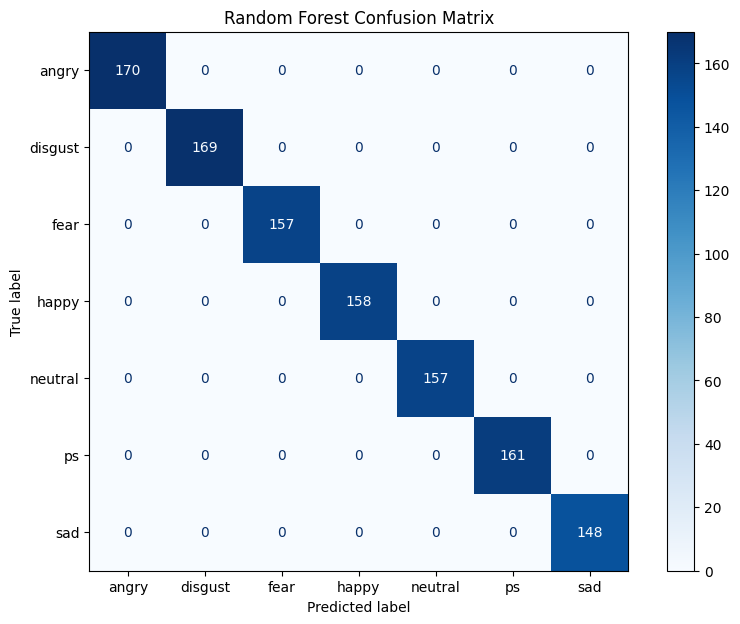

Random Forest Training Accuracy: 1.0000
Random Forest Testing Accuracy: 1.0000


In [21]:
# Train Random Forest Classifier
def train_random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X.reshape(X.shape[0], -1), y, test_size=0.2,random_state=42)
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, np.argmax(y_train, axis=1))
    
    y_pred = rf_model.predict(X_test)
    # Calculate accuracy
    train_accuracy = rf_model.score(X_train, np.argmax(y_train, axis=1))
    test_accuracy = rf_model.score(X_test, np.argmax(y_test, axis=1))
    # Generate and plot confusion matrix
    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    plt.figure(figsize=(10, 7))
    cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
    display_labels=enc.categories_[0])
    cm_display.plot(cmap=plt.cm.Blues, ax=plt.gca())
    plt.title('Random Forest Confusion Matrix')
    plt.show()
    return train_accuracy, test_accuracy
    
# One-hot encode the labels
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']]).toarray()

# Train and evaluate Random Forest
rf_train_acc, rf_test_acc = train_random_forest(X, y)
print(f"Random Forest Training Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Testing Accuracy: {rf_test_acc:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 256)            │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.4118 - loss: 1.4501 - val_accuracy: 0.8638 - val_loss: 0.3929
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.8671 - loss: 0.3701 - val_accuracy: 0.9074 - val_loss: 0.2711
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9429 - loss: 0.1850 - val_accuracy: 0.9509 - val_loss: 0.1476
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.9508 - loss: 0.1556 - val_accuracy: 0.9542 - val_loss: 0.1351
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 105ms/step - accuracy: 0.9563 - loss: 0.1347 - val_accuracy: 0.9699 - val_loss: 0.0972
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9745 - loss: 0.0931 - val_accuracy: 0.9732 - val_loss: 0.0771
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9756 - loss: 0.0836 - val_accuracy: 0.9710 - val_loss: 0.1084
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - accuracy: 0.9683 - loss: 0.0958 - val_accuracy: 0.

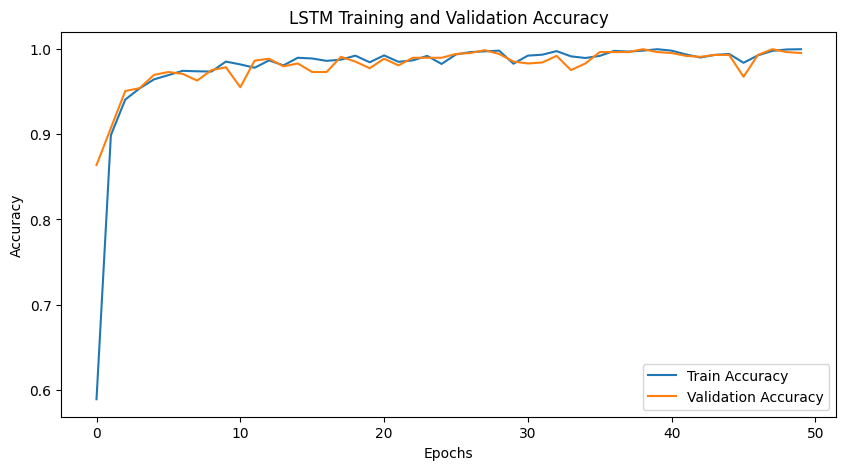

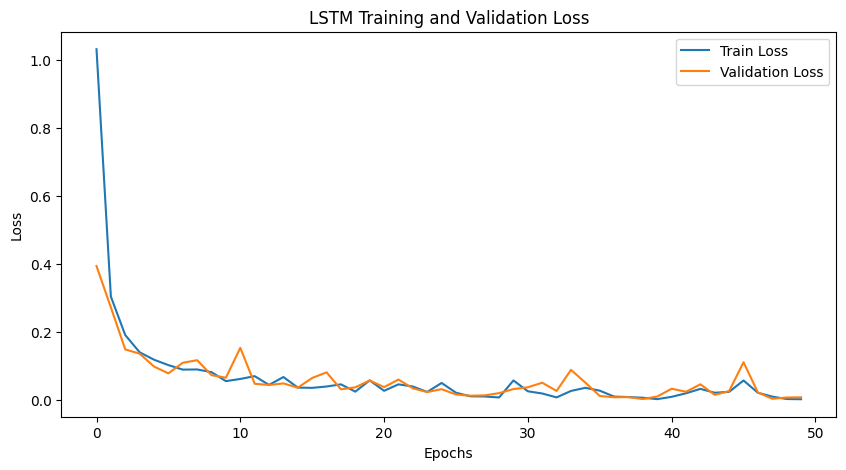

LSTM Training Accuracy: 0.9989
LSTM Testing Accuracy: 0.9973


In [25]:
# Train LSTM Model
def train_lstm(X, y):
    # Reshape X for LSTM [samples, time steps, features]
    X = X.reshape(X.shape[0], 40, 1)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create LSTM model
    model = Sequential([
        LSTM(256, return_sequences=False, input_shape=(40, 1)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(7, activation='softmax')  # Assuming 7 emotion categories
    ])
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # Display model summary
    model.summary()
    
    # Train the model
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=64)
    
    # Save the model
    model.save('tess_trained_model.h5')
    
    # Evaluate the model
    train_accuracy = model.evaluate(X_train, y_train)[1]
    test_accuracy = model.evaluate(X_test, y_test)[1]
    
    # Plot accuracy and loss
    epochs = list(range(50))
    
    # Accuracy plot
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, acc, label='Train Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('LSTM Training and Validation Accuracy')
    plt.show()

    # Loss plot
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, loss, label='Train Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('LSTM Training and Validation Loss')
    plt.show()
    
    return train_accuracy, test_accuracy

# Train and evaluate LSTM
lstm_train_acc, lstm_test_acc = train_lstm(X, y)
print(f"LSTM Training Accuracy: {lstm_train_acc:.4f}")
print(f"LSTM Testing Accuracy: {lstm_test_acc:.4f}")
